# Part II - Effect of Customer Characteristics and Time on Riding Duration


BY CHRISTIAN OLUOMA


## Investigation Overview


In this investigation, I want to examine how customer characteristics like Gender, Age and User Type affect the duration of riding. Questions like: "When are most trips taken in terms of day of the month?", "How long does the average trip take per time of the day?" and "Does the length of the average trip depends on if a user is a subscriber or a customer?" will be answered.

## Dataset Overview

The data consists of duration and other attibutes of about 183,412 riding entries. The attributes includes information about the users  such as  gender, age, user type and information about the start hour of each trip and the number of rides taken in each day of the month of february, 2019.

Some features and entries were removed due to inconsistencies and missing information making the data to contain about 139,965 entries.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_FordGoBike= pd.read_csv("FordGoBike_clean.csv")

## Distribution of Riding Duration

The duration in minutes take on a range of values, from about 3 mins to about 20 mins. It is seen that most trips had duration between about 5 mins to about 8mins. The number of trips decreased gradually as the duration increases from about 8 mins to about 20 mins.

There was a sharp increase in the number of trips between about 3 mins and about 5 mins.

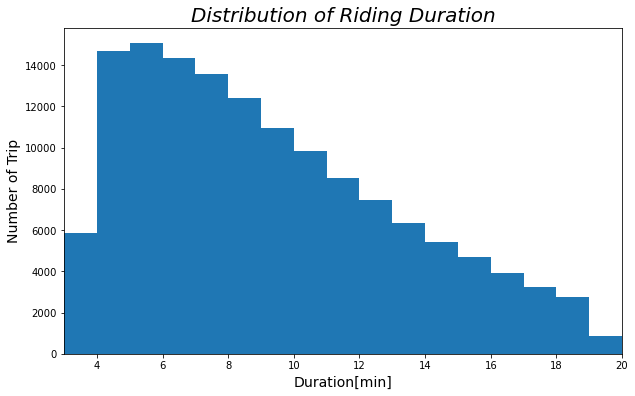

In [3]:
binsize= 1
bins = np.arange(0, df_FordGoBike['duration_min'].max()+ binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_FordGoBike, x = 'duration_min', bins = bins)
plt.xlim([3,20])
plt.title('Distribution of Riding Duration', fontsize= 20, fontstyle='oblique')
plt.xlabel('Duration[min]', fontsize= 14)
plt.ylabel('Number of Trip', fontsize= 14)
plt.show()

## Users Age Vs. Riding Duration

There is a wide range of Users from about 18yrs to about 80yrs. Users between the age of 18yrs - 40yrs spends more time riding with a high concentration of Users between 25yrs to 35yrs. Most Users between 25yrs to 35yrs spend about 10 mins riding with more concentartion on 6 mins.

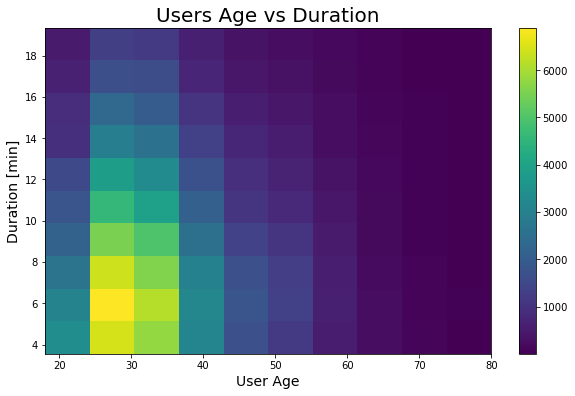

In [4]:
plt.figure(figsize= (10, 6))
plt.hist2d(data= df_FordGoBike, x= "member_age", y= "duration_min")
plt.xlabel("User Age", fontsize= 14)
plt.ylabel("Duration [min]", fontsize= 14)
plt.title("Users Age vs Duration", fontsize= 20)
plt.colorbar();

## Gender Vs. Riding Duration

Females spend an average of about 9 mins riding while males spend an average of about 8 mins riding, a little lower than the females. The other gender spends an average of 9mins riding. The Upper quartile of female riding duration is about 13 mins, for male its about 11 mins and for the other gender, its about 12 mins. All  gender have their minimum and maximum riding duration at about 3 mins and about 19 mins respectively.

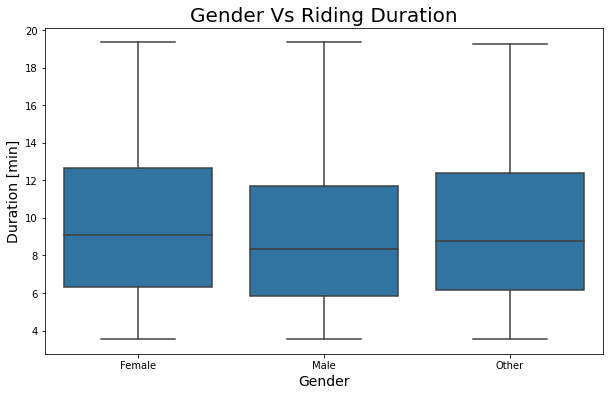

In [5]:
base_color= sns.color_palette()[0]
plt.figure(figsize= (10, 6))
sns.boxplot(data= df_FordGoBike, x= "member_gender", y= "duration_min", color= base_color)
plt.xlabel("Gender", fontsize= 14)
plt.ylabel("Duration [min]", fontsize= 14)
plt.title("Gender Vs Riding Duration", fontsize= 20)
plt.show();

## User Type Vs. Riding Duration

Subscribers spend an average of 9 mins riding while Customers spend an average of about 11 mins riding. Customers tend to have higher riding duration than subscribers. The upper quartile of customers riding duration is a little below 15 mins while the upper quartile of subcribers riding duration is a little below 12.5 mins. Subscribers with riding duration between 5 mins and 7.5 mins tend to be concentrated. The customers are normally spread between the minimum duration and the maximum duration unlike the subscribers with few people having riding duration above 15 mins.

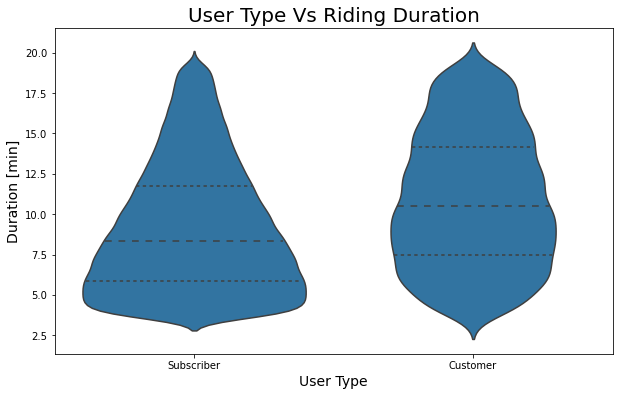

In [6]:
plt.figure(figsize= (10, 6))
sns.violinplot(data= df_FordGoBike, x= "user_type", y= "duration_min", color= base_color, inner= "quartile")
plt.xlabel("User Type", fontsize= 14)
plt.ylabel("Duration [min]", fontsize= 14)
plt.title("User Type Vs Riding Duration", fontsize= 20)
plt.show();

## Time of Day Vs. Riding Duration

At the start of the day, the riding duration takes an haphazard look with it peaks (9.6 mins and 9.8 mins) at the 3rd and 8th hour of the day respectively. The hour with the least duration is the 4th hour of the day. From the 17th hour having a peak of 9.5 mins, there is a steady decline in riding duration till the end of the day. People tends to spend more time riding between the 5th and 9th hours of the day.

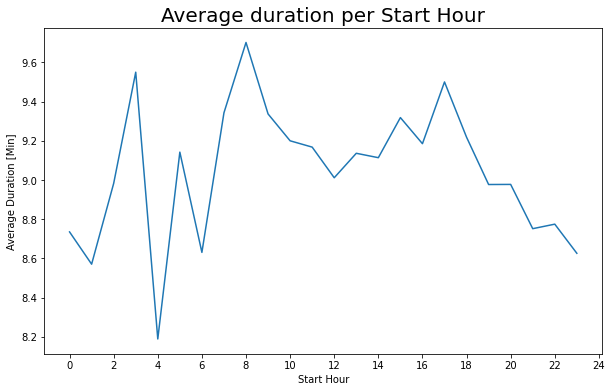

In [7]:
df_FordGoBike.groupby("start_hour")["duration_min"].mean().plot(kind= "line", figsize= (10,6), color= base_color)
plt.title("Average duration per Start Hour", fontsize= 20)
plt.xlabel("Start Hour")
plt.ylabel("Average Duration [Min]")
plt.xticks([x for x in range(0,25,2)])
plt.show();

## Day of the Month Vs. Riding Duration

In the month of february, 2019, Day 13 recorded the least average riding duration while Day 23 recorded the highest average riding duration. The average duration recorded in other days of the month tends to range between 8.8 mins and 9.5 mins.

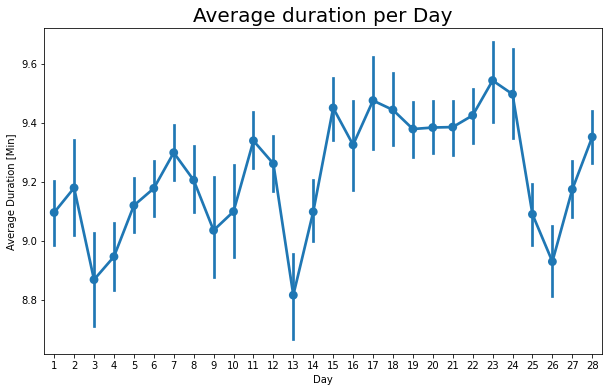

In [8]:
plt.figure(figsize= (10, 6))
sns.pointplot(data= df_FordGoBike, x= "day", y= "duration_min", color= sns.color_palette()[0])
plt.title("Average duration per Day", fontsize= 20)
plt.xlabel("Day")
plt.ylabel("Average Duration [Min]")
plt.show();

In [ ]:
!jupyter nbconvert FordGoBike_slide_deck.ipynb --to slides --post serve --no-input --no-prompt